In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

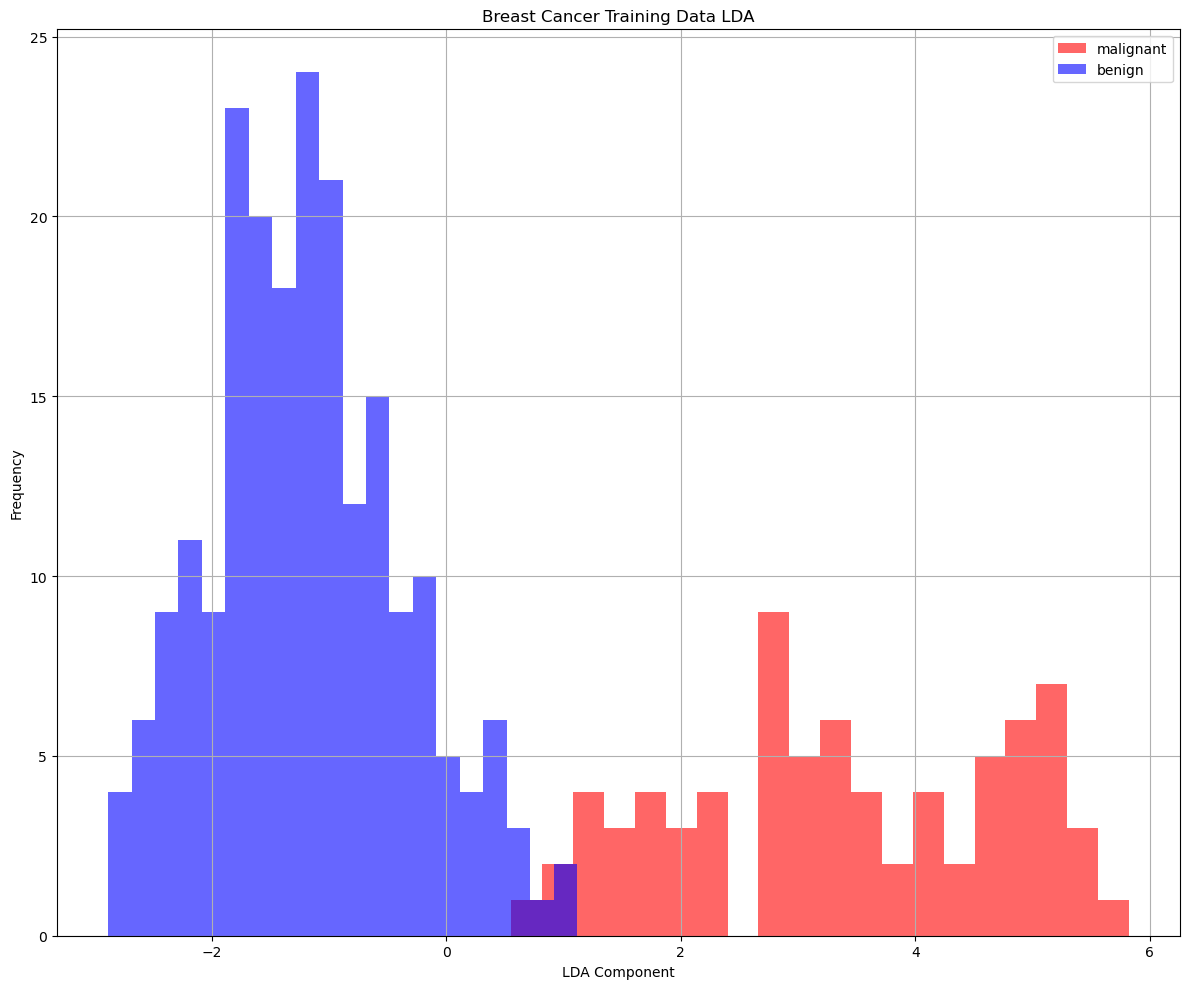

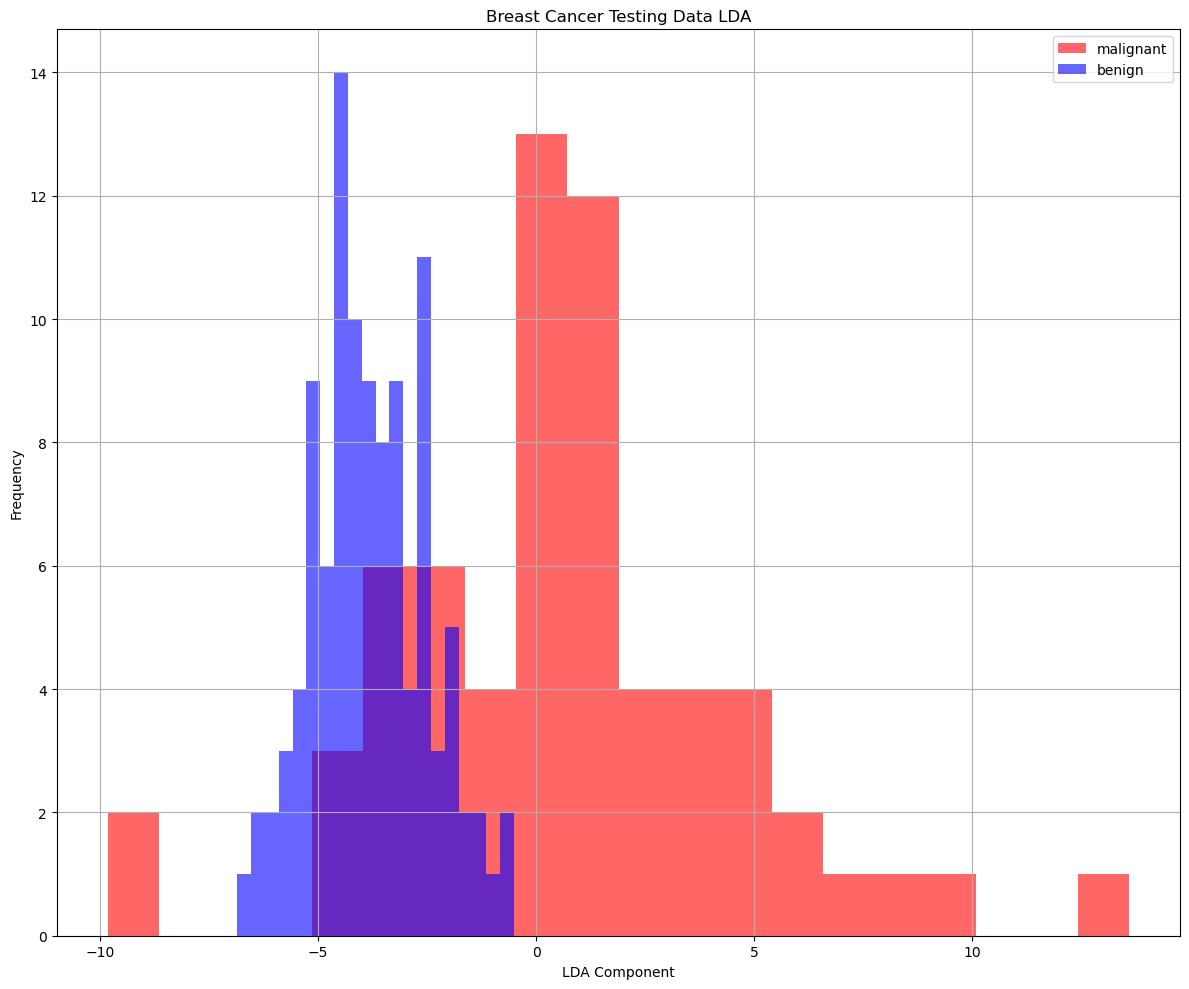

[I 2025-04-27 03:07:17,206] A new study created in memory with name: no-name-942249c7-cdca-4578-b6f9-082dfe874250
[I 2025-04-27 03:07:18,896] Trial 0 finished with value: 0.9790683605565638 and parameters: {'n_estimators': 1757, 'learning_rate': 0.003364929049625642, 'num_leaves': 42, 'max_depth': 4, 'min_child_samples': 66, 'subsample': 0.6040881442828776, 'colsample_bytree': 0.797178061605476, 'reg_alpha': 1.9638468488036087e-07, 'reg_lambda': 9.053187309289665e-07}. Best is trial 0 with value: 0.9790683605565638.
[I 2025-04-27 03:07:20,147] Trial 1 finished with value: 0.9826376285541439 and parameters: {'n_estimators': 1378, 'learning_rate': 0.010696302412500233, 'num_leaves': 46, 'max_depth': 3, 'min_child_samples': 61, 'subsample': 0.7020036358699622, 'colsample_bytree': 0.7222827866697135, 'reg_alpha': 4.01215267590601e-05, 'reg_lambda': 1.1398967523296552e-06}. Best is trial 1 with value: 0.9826376285541439.
[I 2025-04-27 03:07:22,150] Trial 2 finished with value: 0.97900786448

Best trial:
Accuracy: 0.989534180278282
Best hyperparameters:  {'n_estimators': 4887, 'learning_rate': 0.016200315335755982, 'num_leaves': 17, 'max_depth': 11, 'min_child_samples': 94, 'subsample': 0.8029697330871046, 'colsample_bytree': 0.7549893329971729, 'reg_alpha': 0.0008095074535482549, 'reg_lambda': 0.5241008982204522}


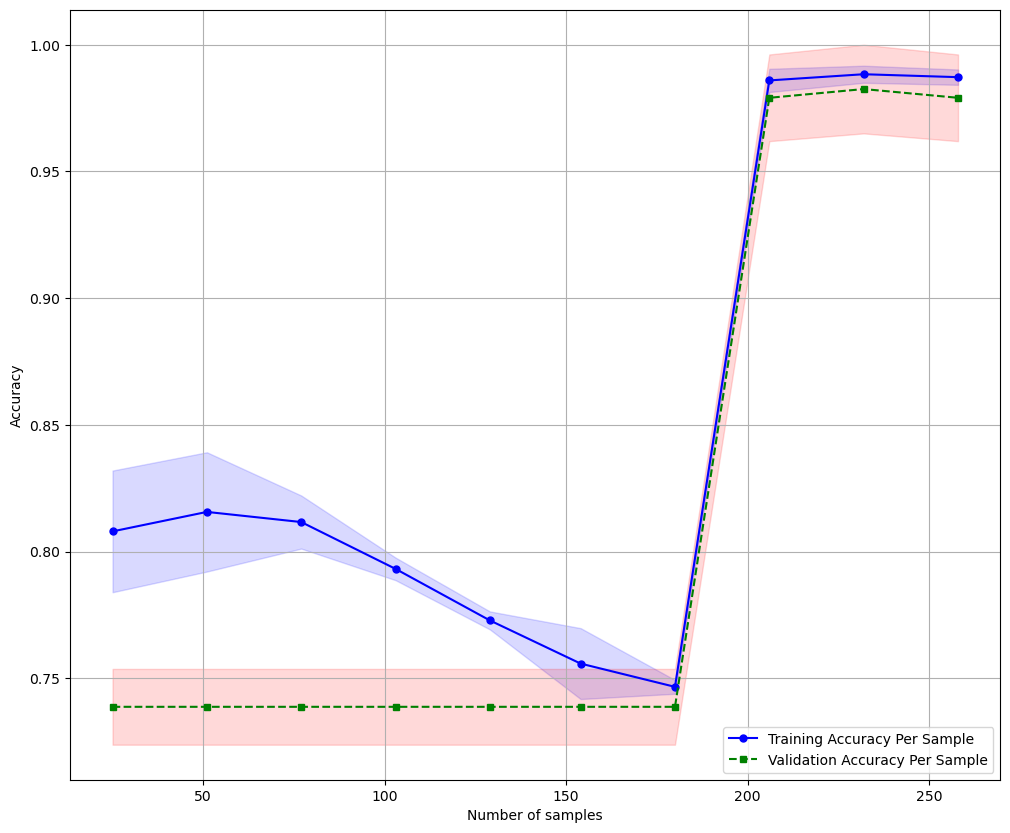

Confusion Matrix
[[ 28  36]
 [  0 107]]
Accuracy: 0.7895, Precision: 0.7483, Recall: 1.0000, F1: 0.8560, AUC:0.8564


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)